<a href="https://colab.research.google.com/github/dibyanshushekhardey/Hello-ML/blob/main/2.%20Classification/Supervised%20I/Support%20Vector%20Machines/SVM_NuSVC_and_LinearSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
# iris.data
X = iris.data
y = iris.target

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Nu-Support Vector Classification**

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
clf = make_pipeline(StandardScaler(), NuSVC())
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('nusvc',
                 NuSVC(break_ties=False, cache_size=200, class_weight=None,
                       coef0=0.0, decision_function_shape='ovr', degree=3,
                       gamma='scale', kernel='rbf', max_iter=-1, nu=0.5,
                       probability=False, random_state=None, shrinking=True,
                       tol=0.001, verbose=False))],
         verbose=False)

In [36]:
#Prediction
y_pred = clf.predict(X_test)
print(y_pred)

[2 0 1 2 2 0 1 1 2 1 2 2 0 1 0 2 0 2 1 2 2 2 1 2 2 1 1 0 1 1]


In [37]:
#Check precision
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))
print("----------------")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

----------------
0.9666666666666667


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 12]])

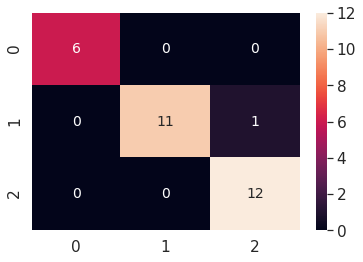

In [49]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}) 

plt.show()

**Linear Support Vector Classification**

In [44]:
from sklearn.svm import LinearSVC
clf1 = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf1.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=0,
                           tol=1e-05, verbose=0))],
         verbose=False)

In [45]:
y_pred1 = clf1.predict(X_test)
print(y_pred1)

[2 0 1 2 2 0 2 1 2 1 2 2 0 1 0 2 0 2 1 2 2 2 1 2 2 1 1 0 2 1]


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred1))
print("----------------")
print(accuracy_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.75      0.86        12
           2       0.80      1.00      0.89        12

    accuracy                           0.90        30
   macro avg       0.93      0.92      0.92        30
weighted avg       0.92      0.90      0.90        30

----------------
0.9


In [47]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[ 6,  0,  0],
       [ 0,  9,  3],
       [ 0,  0, 12]])

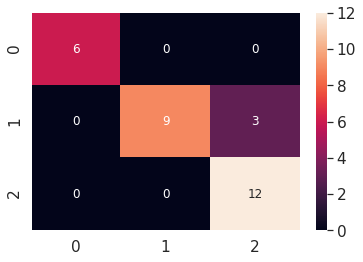

In [50]:
df_cm1 = pd.DataFrame(cm1, range(3), range(3)) # Range fitted based on the previous array
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm1, annot=True, annot_kws={"size": 12}) # font size , size range based on theprevious plot matrix

plt.show()